In [2]:
import math
import numpy as np
from numpy import genfromtxt
import operator
import random

In [3]:
# Import X and y from csv file
def read_logistic_data(filename):
    my_data = genfromtxt(filename, delimiter=';')
    X = []
    y= []
    for i in range(len(my_data)):
        new_data = my_data[i]
        y.append([new_data[-1]])
        X.append(np.delete(new_data, -1))
    return X, y

X_train, y_train = read_logistic_data('digits123-1.csv')
X_test, y_test = read_logistic_data('digits123-2.csv')

### Question 1: k-means clustering

In [4]:
def random_means(k, X):
    initialWeight = []
    for i in range(k):
        rand_x = int(random.uniform(0, len(X)-1))
        initialWeight.append(X[rand_x])
                
    return initialWeight

In [78]:
def KMeans(X, k, iterations, means):    
    for i in range(iterations):
        # Initialize lists to store assigned values in clusters
        clusters = list()
        for i in range(len(means)):
            clusters.append([])

        # Assign all training examples to a cluster
        for i in range(len(X)):
            distance = 9999
            for j in range(len(means)):
                euclidean = math.sqrt(sum((X[i]-means[j])**2))
                # Find the cluster with smallest euclidean distance
                if euclidean < distance:
                    result = j
                    distance = euclidean
            clusters[result].append(i)
        
        # Update cluster means
        for i in range(len(clusters)):
            mean_sum = 0
            for x in clusters[i]:
                mean_sum += X[x]
            if len(clusters[i]) != 0:
                mean_sum = mean_sum / len(clusters[i])
            means[i] = mean_sum
 
    return means, clusters

In [79]:
# Example run: random means initialization (i.e. pick random training examples as mean)
rand_means = random_means(3, X_train)
means, clusters = KMeans(X_train, 3, 15, rand_means)

np.set_printoptions(precision=2, suppress=True)

for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

[  0.     0.83   7.72  13.81   8.98   2.05   0.29   0.01   0.     3.08
   9.81  13.93  12.89   4.26   0.39   0.01   0.01   2.51   6.9   11.03
  13.49   4.03   0.12   0.     0.01   0.71   4.74  11.46  13.25   2.71
   0.03   0.     0.     0.31   4.31  12.63  12.11   1.72   0.01   0.     0.
   0.32   5.89  13.35  10.67   2.62   0.55   0.01   0.     0.91   8.96
  14.4   12.93   7.63   4.39   0.46   0.     0.86   7.87  13.53  12.89
   7.71   4.4    1.51]
Number of training examples assigned to mean:  150
-------------------------------------------------------------------------
[  0.     0.48   8.75  14.98  14.32   7.04   0.5    0.     0.03   4.35
  12.64   8.78  10.75  12.08   1.79   0.02   0.01   1.97   3.61   2.77
  10.62  10.48   0.92   0.     0.     0.12   1.05   7.32  13.02   7.07
   0.32   0.     0.     0.07   0.76   4.66  11.65  10.52   1.83   0.     0.
   0.45   1.68   2.62   6.24   9.78   5.05   0.01   0.     0.95   7.8
   7.24   8.76  12.58   6.77   0.47   0.     0.35   9.48  15.1

In [80]:
# Example run: another random means initialization
rand_means = random_means(3, X_train)
means, clusters = KMeans(X_train, 3, 15, rand_means)

for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

[  0.     0.37   7.25  12.98  13.75   8.39   0.94   0.     0.02   3.75
  11.15   8.68  11.03  12.82   2.12   0.02   0.01   2.28   4.34   4.41
  11.01  11.08   1.25   0.     0.     0.73   2.2    7.88  12.66   8.1
   0.55   0.     0.     0.19   0.88   3.79  11.07  12.33   2.19   0.     0.
   0.48   1.49   0.89   5.39  11.7    5.58   0.01   0.     0.94   6.58
   5.31   8.13  13.44   6.43   0.29   0.     0.3    7.84  13.3   14.25
  10.93   2.98   0.68]
Number of training examples assigned to mean:  122
-------------------------------------------------------------------------
[  0.     0.17   3.57  12.98  12.61   4.67   0.54   0.01   0.     0.57
   6.07  14.44  15.     7.62   0.86   0.01   0.02   1.04   6.2   14.05  15.
   6.23   0.29   0.     0.01   1.45   7.39  14.87  14.12   3.67   0.05   0.
   0.     0.64   7.02  14.77  13.49   2.6    0.01   0.     0.     0.39
   6.74  14.24  13.74   2.89   0.06   0.     0.     0.2    5.7   13.76
  13.35   3.77   0.33   0.     0.     0.07   3.9   12.35 

In [81]:
# Example run: handselected values for mean.
means, clusters = KMeans(X_train, 3, 15, [X_train[0], X_train[150], X_train[299]])

for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

[  0.     0.09   3.29  12.9   12.44   4.34   0.55   0.01   0.     0.4
   5.78  14.51  15.04   7.26   0.79   0.01   0.03   1.07   6.31  14.29
  15.12   6.19   0.25   0.     0.01   1.51   7.25  14.88  14.53   3.81
   0.05   0.     0.     0.68   6.91  14.79  13.64   2.65   0.01   0.     0.
   0.41   7.04  14.55  13.66   2.45   0.     0.     0.     0.21   5.9
  14.25  13.41   3.17   0.09   0.     0.     0.05   3.58  12.19  12.9
   3.67   0.19   0.  ]
Number of training examples assigned to mean:  80
-------------------------------------------------------------------------
[  0.     1.36  11.82  14.56   7.16   0.96   0.     0.     0.02   5.56
  13.74  12.26  10.99   3.23   0.03   0.     0.     3.79   7.6    6.24
  11.51   3.98   0.03   0.     0.     0.35   1.83   6.28  12.36   3.17   0.
   0.     0.     0.03   0.96   8.71  11.27   1.73   0.     0.     0.     0.16
   3.78  11.3    8.67   2.52   0.88   0.02   0.     1.37  11.45  14.06
  12.71  11.54   8.49   1.01   0.     1.4   12.01  14.45  

### Question 2: optimized k

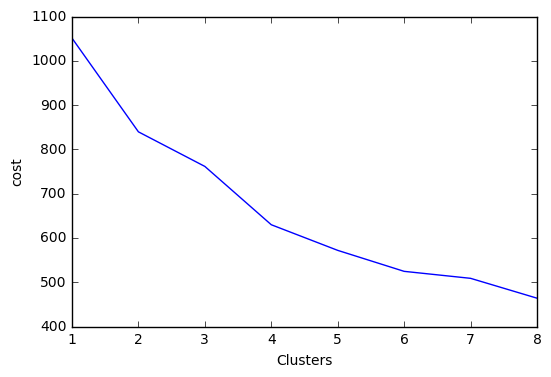

In [82]:
import matplotlib.pyplot as plt
def J(means, clusters, X):
    cost_sum = 0
    cluster_means = []
    for i in range(len(clusters)):
        for x in clusters[i]:
            cost_sum += sum((X[x]-means[i])**2)
    return cost_sum / len(X)

cost = []
k_list = []
rand_means = random_means(9, X_train)
for k in range(1,9):
    means, clusters = KMeans(X_train, k, 15, rand_means[:k])
    cost.append(J(means, clusters, X_train))
    k_list.append(k)
    
plt.plot(k_list, cost)
plt.ylabel("cost")
plt.xlabel("Clusters")
plt.show()
    
    

    
# sum = 0
# for every training example: 
# sum +=  || training example - cluster centroid of assigned cluster || ^ 2
#
# sum = sum / n of training examples



### Question 3: Cluster comparing

In [94]:
means, clusters = KMeans(X_train, 3, 15, [X_train[0], X_train[150], X_train[299]])
wrong = []
for i in range(len(clusters)):
    wrong.append([])
    for x in clusters[i]:
        if y_train[x][0] != i+1:
            wrong[i].append(y_train[x][0])

            
for i in range(len(clusters)):
    print "Classified Cluster", i+1,":"
    print wrong[i]

Classified Cluster 1 :
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Classified Cluster 2 :
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Classified Cluster 3 :
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


## Discussion

The data shown above are all the errors that were made by the k-means classifier. It shows the label that was given by the dataset below the cluster that it was classified under.

It is noticable that cluster 3 has the most errors with classifying the digits data. Cluster 1 only has errors with data that was originally from cluster 3. Cluster 2 has the same problem with cluster 1.